# Exploratory Data Analysis

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

This dataset is availabel at [UCI Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing)

#### Additional Information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010).
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

### Data Dictionary

#### Client Attributes
- **age** (numeric)
- **job**: type of job (categorical: 'admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- **marital**: marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
- **education** (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- **default**: has creadit in default? (categorical: 'no', 'yes', 'unknown')
- **housing**: has housing loan? (categorical: 'no', 'yes', 'unknown')
- **loan**: has personal loan? (categorical: 'no', 'yes', 'unknown')

#### Last Telephone Contact
- **contact**: contact communication type (categorical: 'cellular', 'telephone')
- **month**: last contact month of year (categorical: 'jan', 'feb', 'mar',...,'dec')
- **day_of_week**: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
- **duration**: last contact duration, in seconds (numeric). note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Other Attributes
- **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- **previous**: number of contacts performed before this campaign and for this client (numeric)
- **poutcome**: outcome of the previous marketing campaign (categorical: 'failure', 'non-existent', 'success')

#### Social and Economic Context
- **emp.var.rate**: employment variation rate - quarterly indicator (numeric)
- **cons.price.idx**: consumer price index - monthly indicator (numeric)
- **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)
- **euribor3m**: euribor 3 month rate - daily indicator (numeric)
- **nr.employed**: number of employees - quarterly indicator (numeric)

In [6]:
# Import data
df = pd.read_csv(r"E:\Projects\machine-learning-projects\Predictive analysis of bank telemarketing\data\bank-additional\bank-additional-full.csv", sep=";")
df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [12]:
poutcomes = df[df.poutcome != 'nonexistent'].poutcome.apply(lambda x: 1 if x == "success" else 0)
coutcomes = df.y.apply(lambda x: 1 if x == "yes" else 0)

print(f"Previous Campaign -> Number of records: {len(poutcomes)}, Success Rate: {round(poutcomes.sum()*100/len(poutcomes), 2)}%")
print(f"Current Campaign -> Number of records: {len(df)}, Success Rate: {round(coutcomes.sum()*100/len(df), 2)}%")

Previous Campaign -> Number of records: 5625, Success Rate: 24.41%
Current Campaign -> Number of records: 41188, Success Rate: 11.27%


11.27% response rate in the population. Applying stratified sampling to preserve the distribution in test and training sets. Note that the data are ordered by date so we'll need to first shuffle the dataset rather than simply splitting it.

In [14]:
X, y = df.drop("y", axis=1), df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, shuffle=True, test_size=0.2)

In [18]:
print("Number of training records:", len(X_train))
print("\nTraining proportions:\n", y_train.value_counts()/len(y_train))

Number of training records: 32950

Training proportions:
 no     0.887344
yes    0.112656
Name: y, dtype: float64


In [19]:
print("Number of test record:", len(X_test))
print("\nTest proportions:\n", y_test.value_counts()/len(y_test))

Number of test record: 8238

Test proportions:
 no     0.887351
yes    0.112649
Name: y, dtype: float64


Save the training and test sets

In [20]:
df_test = pd.concat([X_test, y_test], axis=1)
print("Test dataset shape:", df_test.shape)
df_test.to_csv("./data/test.csv", sep=",", index=False)

Test dataset shape: (8238, 21)


In [21]:
bank = pd.concat([X_train, y_train], axis=1)
print("Train dataset shape:", bank.shape)
bank.to_csv("./data/train.csv", sep=",", index=False)

Train dataset shape: (32950, 21)


Checking how many numeric and categorical columns are there in our dataset

In [25]:
bank.dtypes.groupby(bank.dtypes).size()

int64       5
float64     5
object     11
dtype: int64

In [45]:
dtypes = pd.DataFrame(bank.dtypes.rename("type")).reset_index().astype("str")
# Excluding duration since it is a leaky variable
dtypes = dtypes.query("index != 'duration'")
numeric = dtypes[dtypes.type.isin(["int64", "float64"])]["index"].values
categorical = dtypes[~(dtypes["index"].isin(numeric)) & (dtypes["index"] != "y")]["index"].values

print("Numeric: \n", numeric)
print("Categorical: \n", categorical)

Numeric: 
 ['age' 'campaign' 'pdays' 'previous' 'emp.var.rate' 'cons.price.idx'
 'cons.conf.idx' 'euribor3m' 'nr.employed']
Categorical: 
 ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome']


## Categorical Data Analysis

#### Any missing value?

In [47]:
bank[categorical].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

#### Distribution of categorical columns

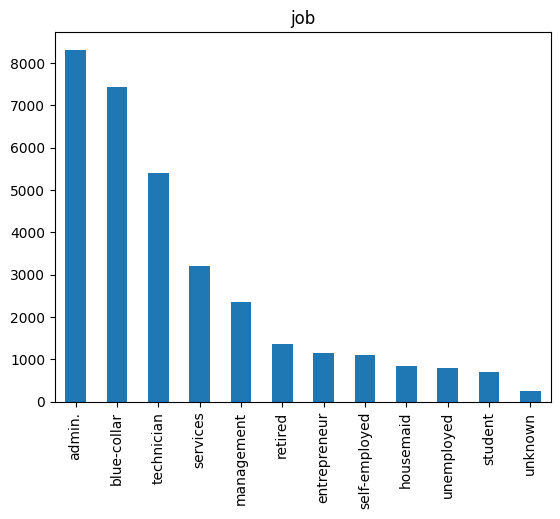

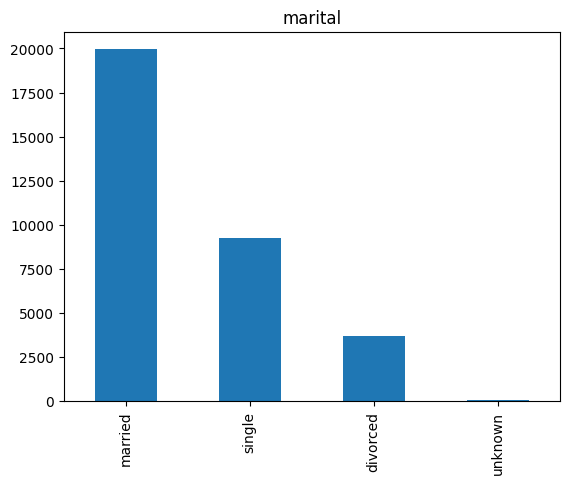

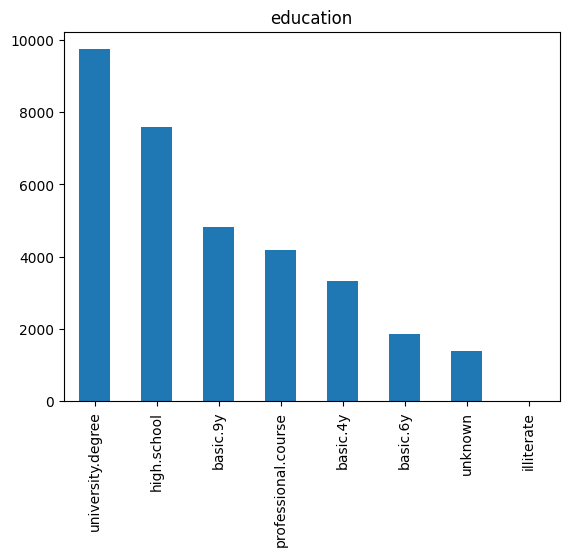

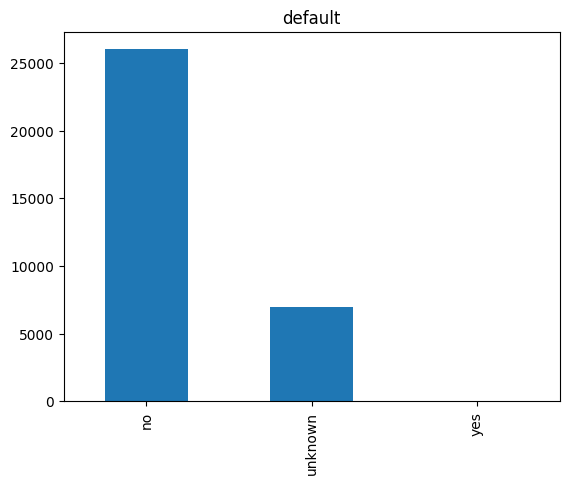

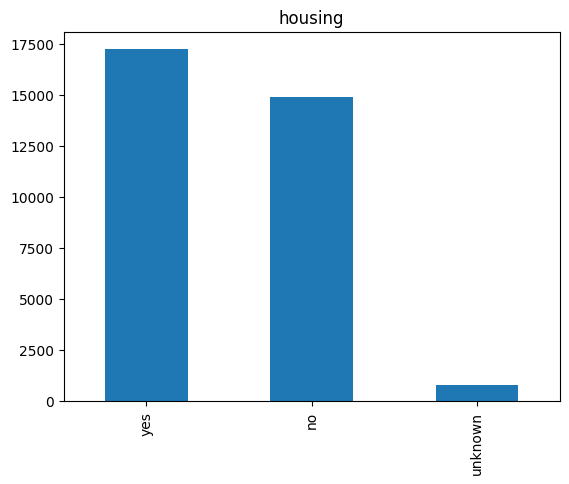

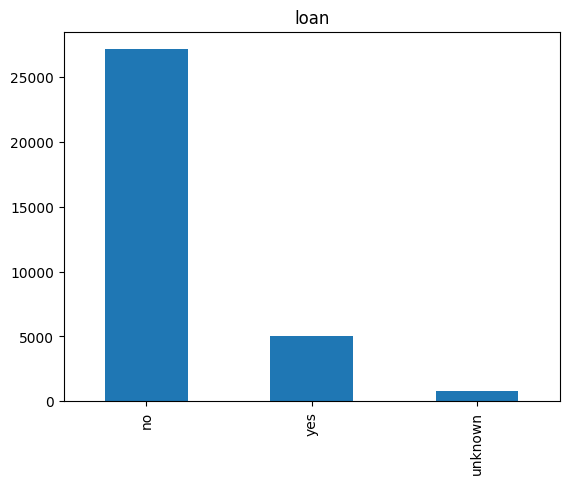

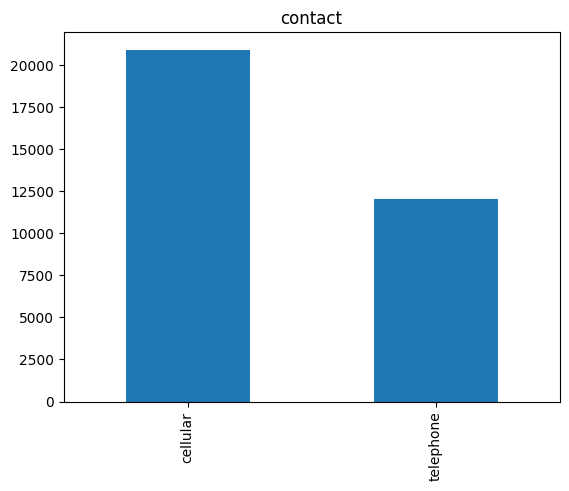

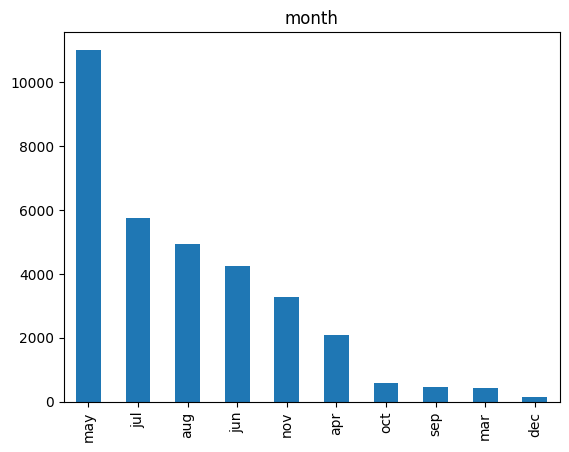

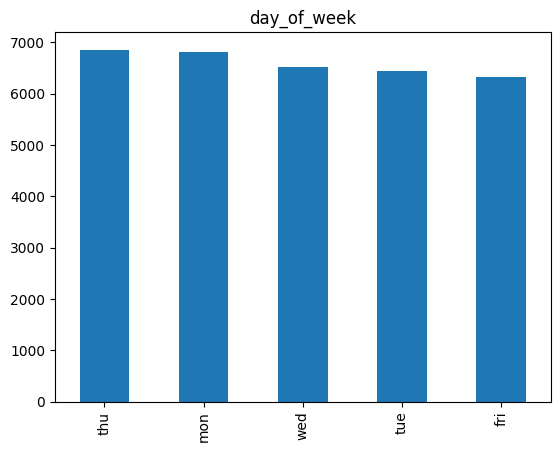

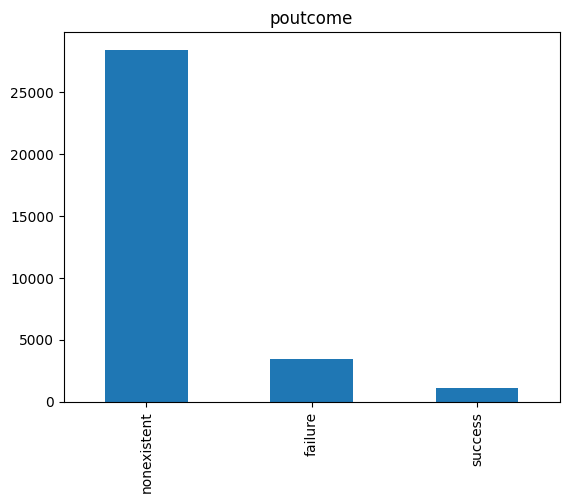

In [53]:
for attr in categorical:
    plt.figure()
    bank[attr].value_counts().plot(kind="bar")
    plt.title(attr)
    plt.show()

##### Observations:
- There are fewer "non-traditional" jobs that could be merged if support is too low to be valuable
- The bank has a good understanding of marital status
- No or very few customers are illeterate
- No or very few customers who have defaulted on a loan - not suprising, the bank probably does not want to extend an offer to customers with bad credit
- Similar proportions of customers with and without housing loans
- Few customers have personal loans
- Almost double as many cellular as landline phone calls
- Fewer calls made in the second half of the year
- Calls are uniform across days of the week
- Some customers were already contacted previously by the bank but many were never contacted at all

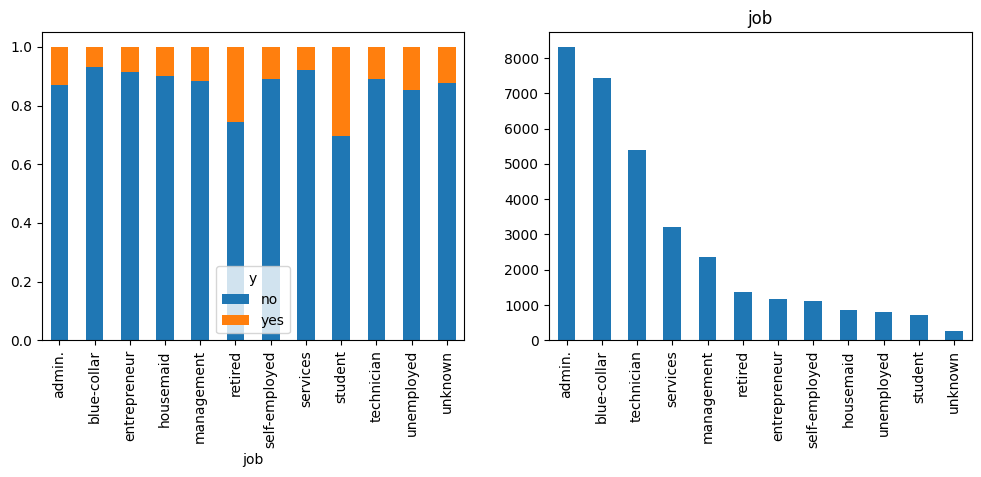

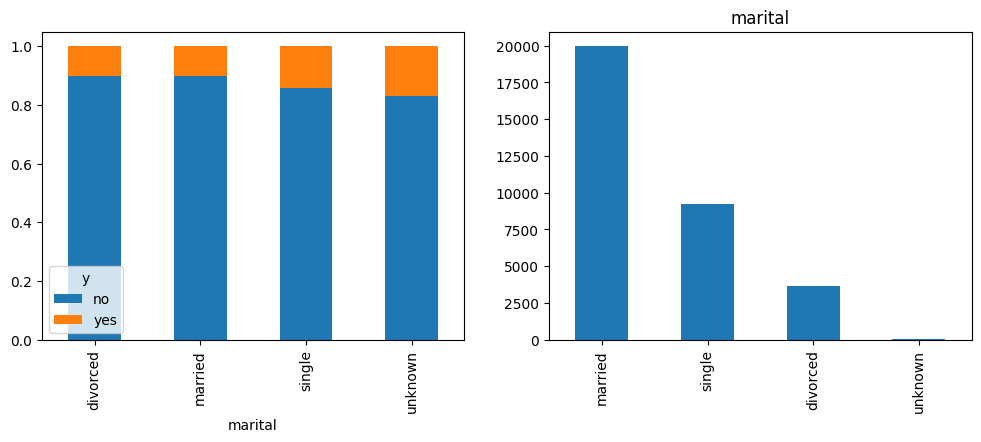

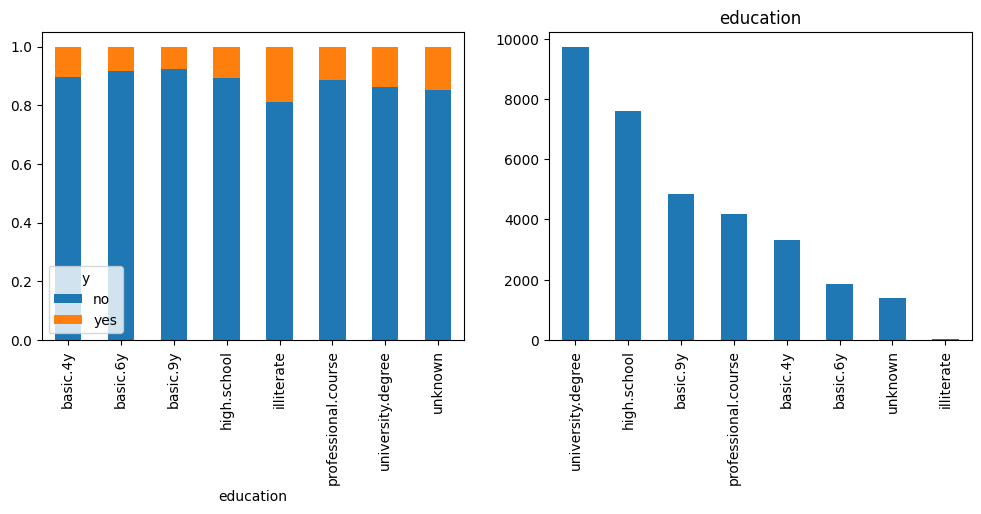

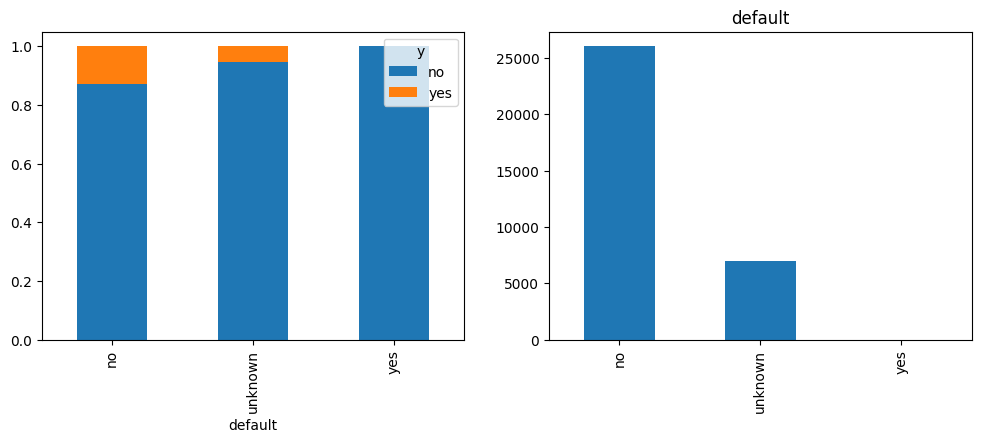

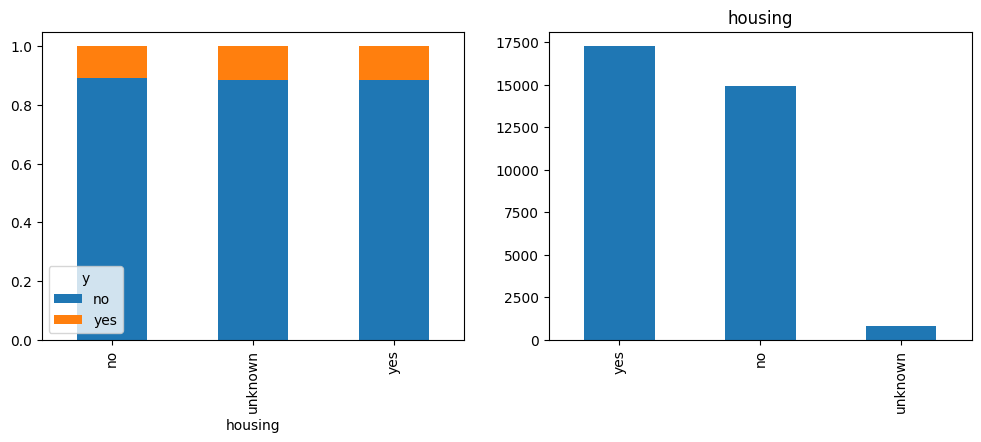

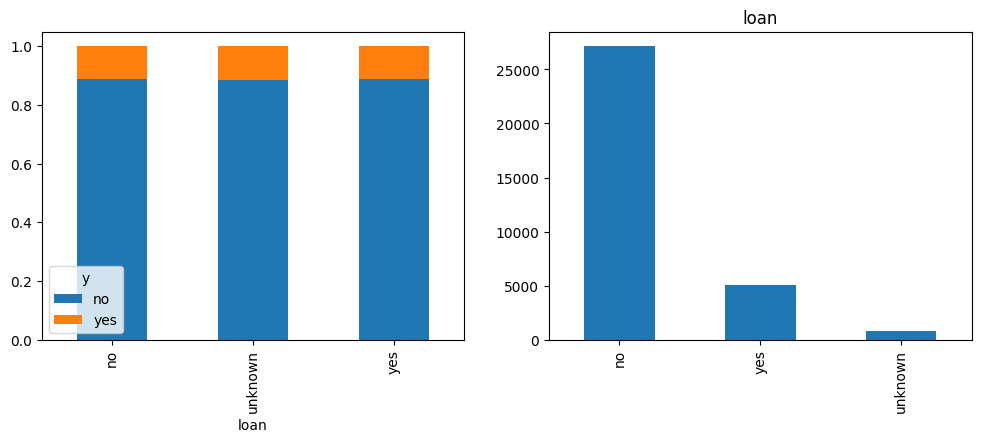

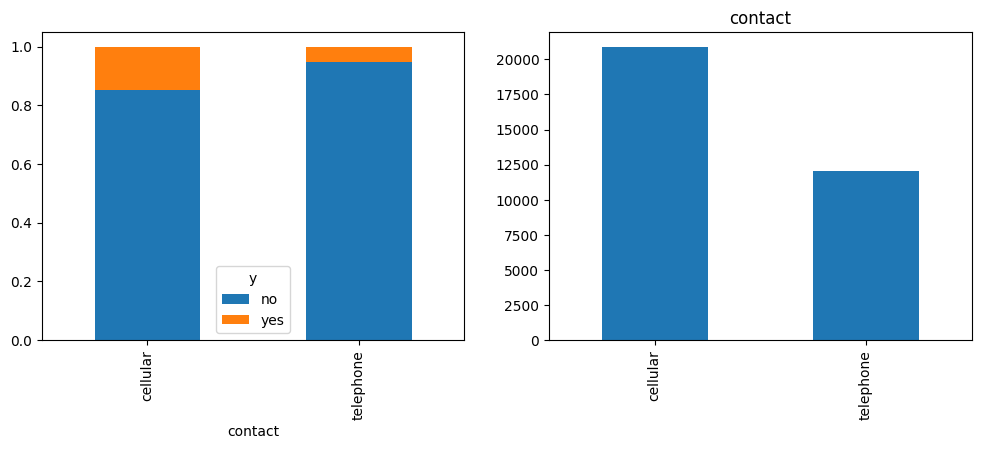

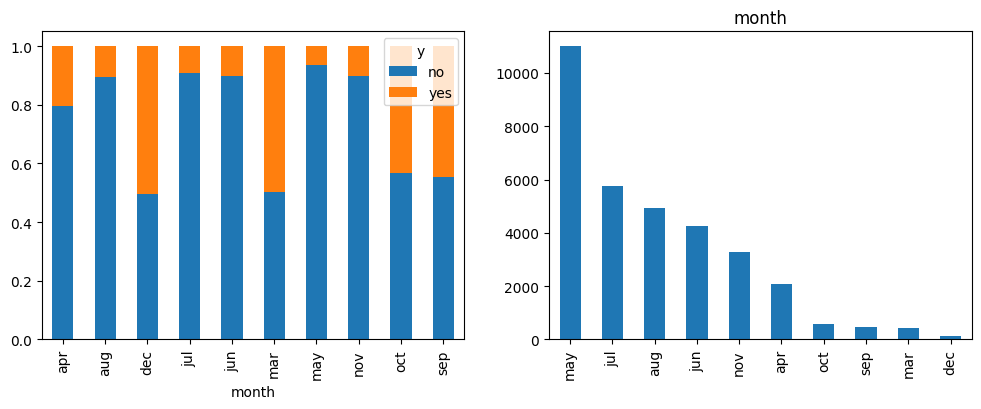

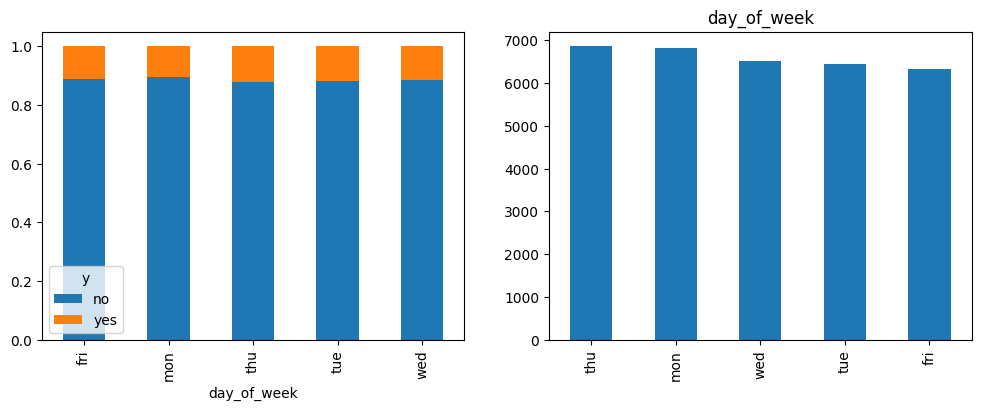

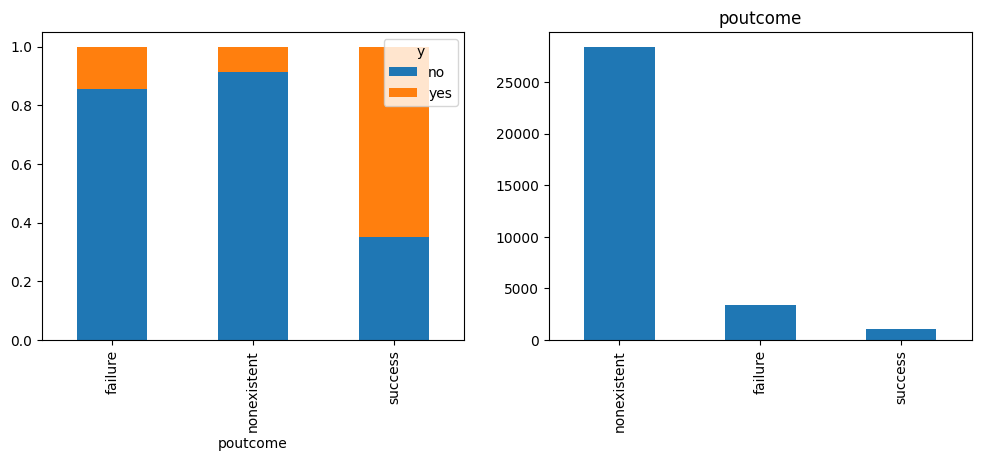

In [54]:
for attr in categorical:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    outcome_counts = bank.groupby([attr, "y"]).size().rename("count").reset_index()
    by_outcome = outcome_counts.pivot(columns="y", values="count", index=attr)
    # Plot the proportions
    by_outcome.div(by_outcome.sum(1), axis=0).plot.bar(stacked=True, ax=ax1);
    # Plot the counts
    bank[attr].value_counts().plot.bar(ax=ax2, legend=False);
    plt.title(attr);

##### Observations:
- Customers with admin, retired, student, and unemployed values tend to respond more. However, retired, student and unemployed have lower support.
- `marital` status isn't very predictive of outcome
- Illiterate customers have a noticiably higher response rate but there are very few of them.
- `default` appears to have predictive power (large proportion of 'no' instances)
- `contact` medium appears to have good predictive power - nearly 4x increase in conversion rate for customers who were contacted on their mobile phone
- `month` of contact appears to be predictive but low support for months with higher response rates
- `day_of_week` doesn't appear to very informative
- If customers were contacted at least once before, they are more likey to convert (regardless of whether the last call was a success or failure)

Several attributes (job, marital, education, default, housing, loan) contain a missing value replaced by 'unknown'. For all variables except for default, the support of the 'unknown' value is low and the associated response rate is similar to that of other known values, indicating that we probably don't need to apply any missing value techniques to these variables.

## Numerical Data Analysis

#### Missing values

In [55]:
bank[numeric].isnull().sum()

age               0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

#### Distribution of numeric columns

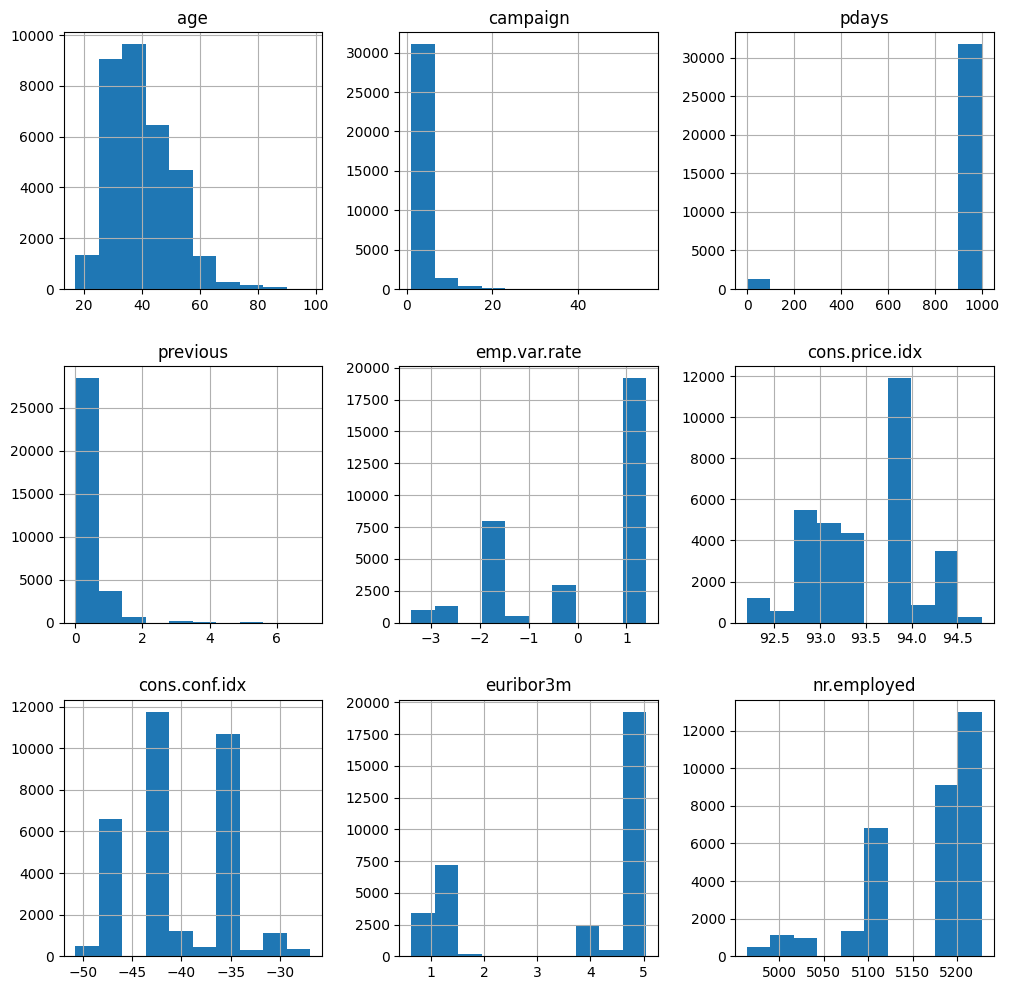

In [56]:
bank[numeric].hist(figsize=(12,12));

In [57]:
bank[numeric].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,2.560607,962.052413,0.174719,0.080470,93.575881,-40.508489,3.618395,5166.899651
std,10.403636,2.752326,187.951096,0.499025,1.571266,0.579209,4.628223,1.735896,72.434812
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


##### Observations:
- Clearly some outliers who are very old - are they really representative of the population or will they skew the result? Conversly, are the outliers informative of the outcome?
- The rest of the distributions except for `campaign` and `previous` are sparse
- `previous` could be treated as a discrete variable

The fact that a majority of instances have `pdays` value of 999 (missing) is going to be problematic if we want to use the attribute as a model feature. Since so few instances have an associated `pdays`, we could remove it from the analysis and modelling process. We could also simply add an indicator that indicates whether or not a customer was previously contacted.

##### What does the distribution of `pdays` look like without missing instances?

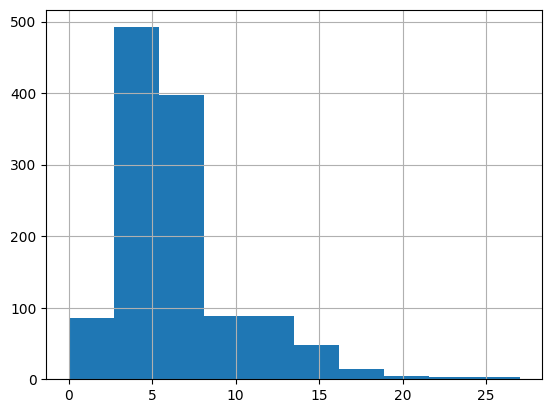

In [60]:
pdays = bank.loc[bank.pdays != 999, ["pdays", "y"]]
pdays.pdays.hist();

##### Is the missing value informative?

In [68]:
x = bank[bank["pdays"] == 999]
x.y.value_counts()/ len(x)

no     0.907578
yes    0.092422
Name: y, dtype: float64

In [69]:
pdays.y.value_counts()/len(pdays)

yes    0.636215
no     0.363785
Name: y, dtype: float64

The response rate is significantly higher for customers with an associated `pdays` value (they were previously contacted). Customers who were previously contacted are seven times more likely to convert than customers without an associated value. It could be that these customers were previously contacted because it was already found that they had higher response rates/ the previous campaign might have leveraged a similar predictive model to identify which customers to contact.

#### Correlation
Evaluate the correlation between bank numeric attributes using Spearman rank correlation since the data isn't normal

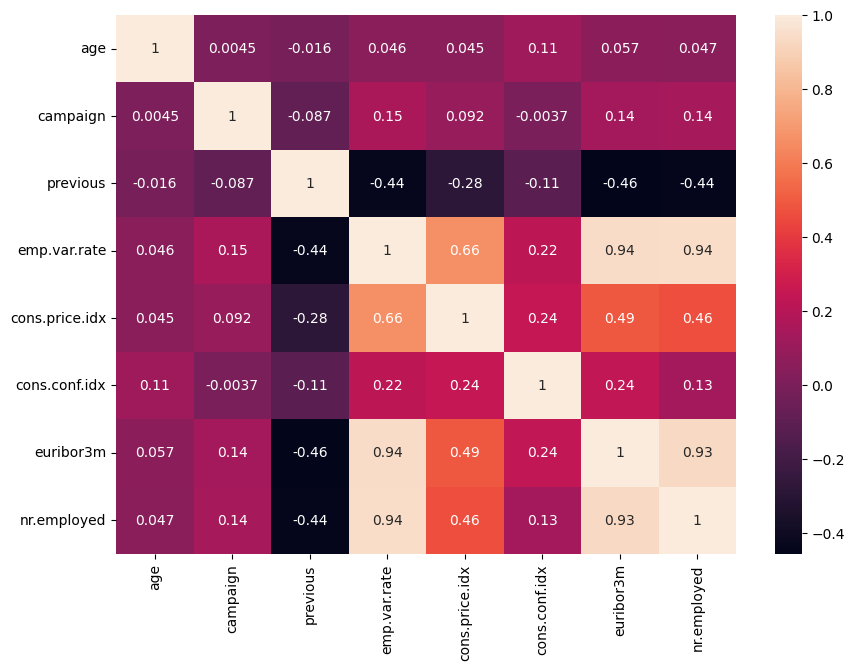

In [70]:
plt.figure(figsize=(10,7));
sns.heatmap(bank[numeric].drop('pdays', axis=1).corr("spearman"), annot=True);

Strongest correlation are between the socio-economic attributes.

Let's plot socio-economic attributes

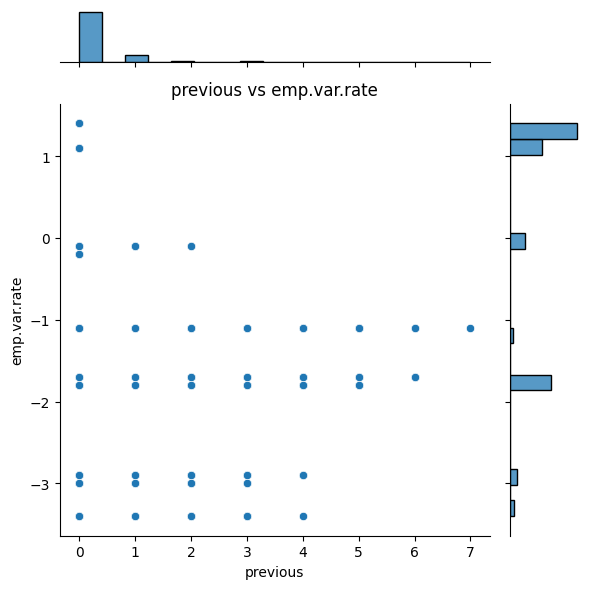

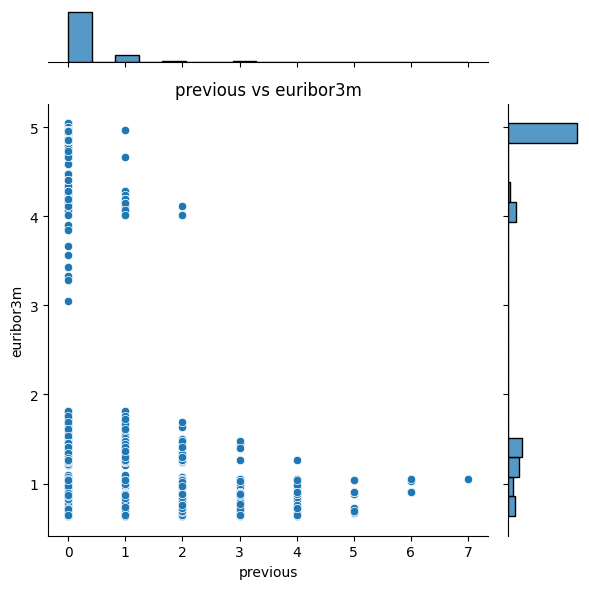

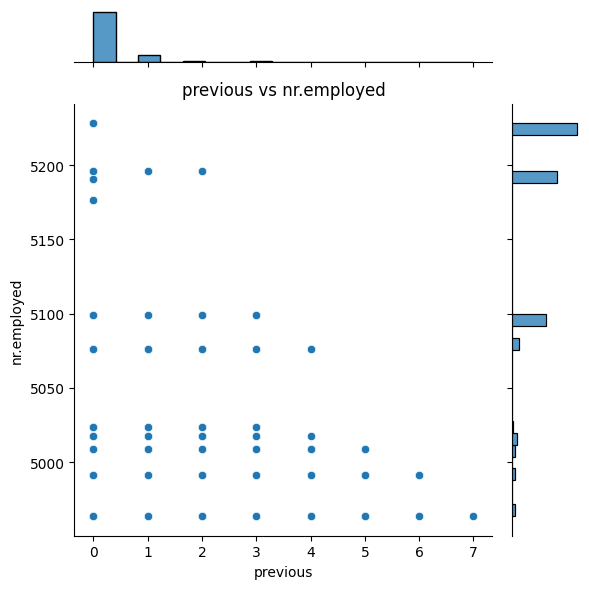

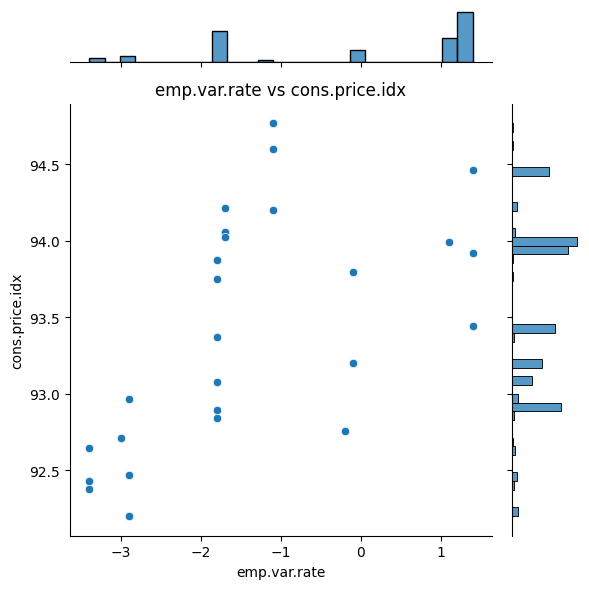

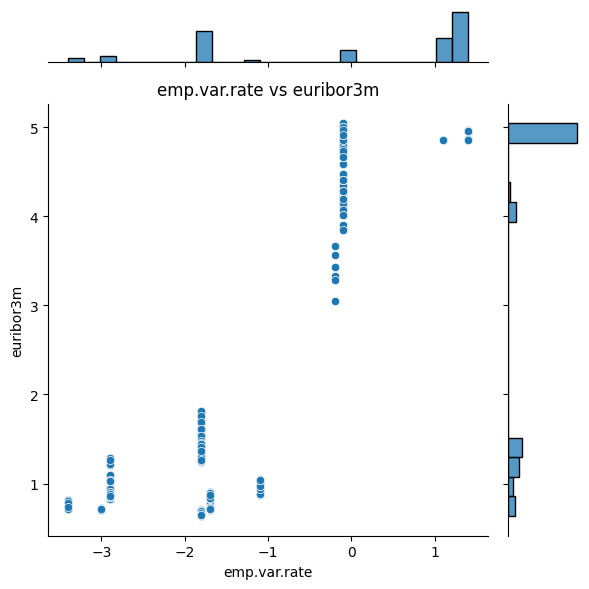

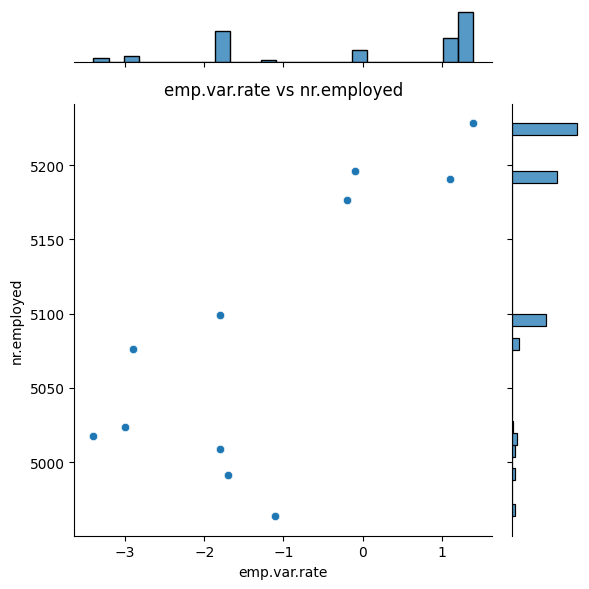

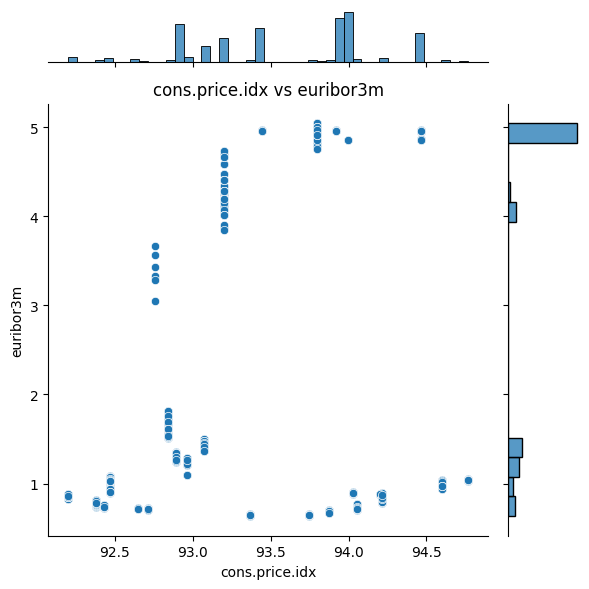

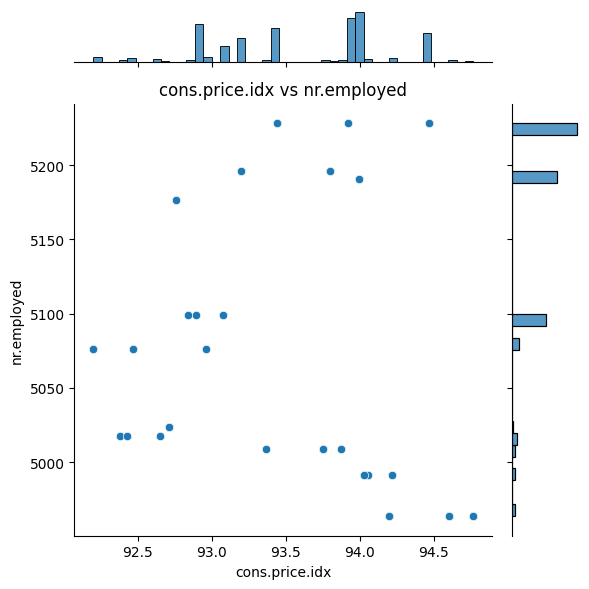

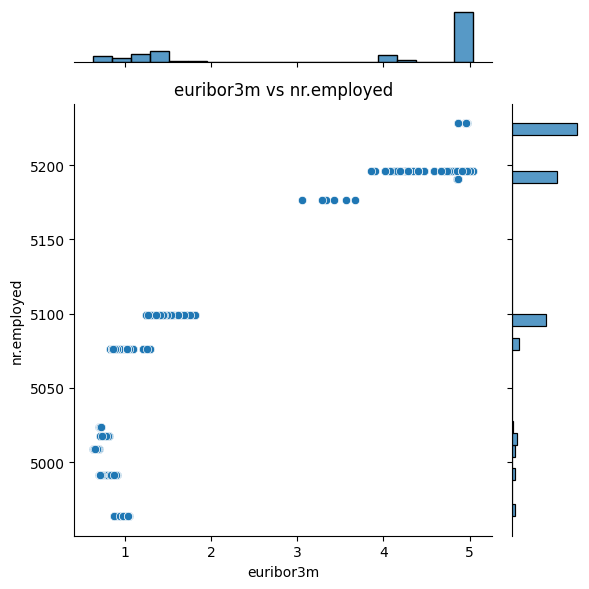

In [79]:
signif_corrs = [
    ("previous", "emp.var.rate"),
    ("previous", "euribor3m"),
    ("previous", "nr.employed"),
    ("emp.var.rate", "cons.price.idx"),
    ("emp.var.rate", "euribor3m"),
    ("emp.var.rate", "nr.employed"),
    ("cons.price.idx", "euribor3m"),
    ("cons.price.idx", "nr.employed"),
    ("euribor3m", "nr.employed")
]

for x, y in signif_corrs:
    sns.jointplot(data = bank, x=bank[x], y=bank[y])
    plt.title(f"{x} vs {y}")
    plt.tight_layout()
    plt.show();

Below factors show strong correlation
- `emp.var.rate` and `cons.price.idx`
- `emp.var.rate` and `euribor3m`
- `emp.var.rate` and `nr.employed`
- `nr.employed` and `euribor3m`

We'll need to determine which variables are most predictive as features and drop the less predictive features to eliminate multicollinearity.

## Customer Attributes

In [80]:
cust_attr = ["age", "campaign", "previous", "y"]

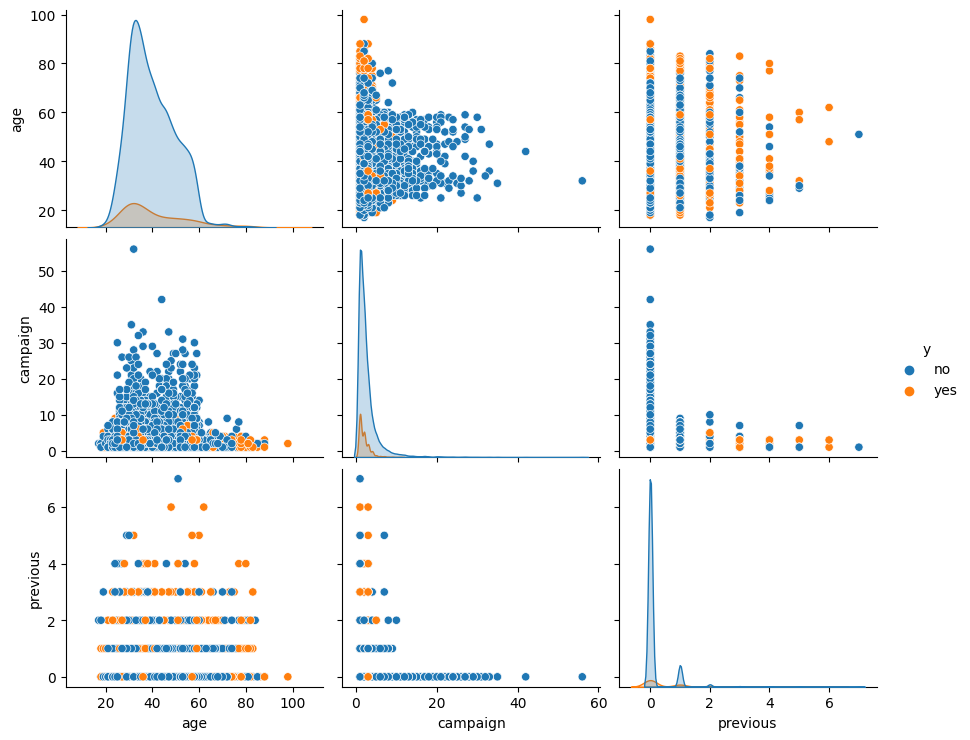

In [85]:
numeric_outcome = pd.concat([bank[numeric], bank['y']], axis=1)
sns.pairplot(numeric_outcome[cust_attr].sample(n=10000), hue='y', aspect=1.2);

Between the ages of 18 and ~62, customers who were contacted more than 10 times were not likely to respond to the campaign. Are customers that were contacted less than 10 times more likey to convert?

In [86]:
campaign_lt10 = bank[bank.campaign < 10]
campaign_lt10.groupby("y").size()/ len(campaign_lt10)

y
no     0.88521
yes    0.11479
dtype: float64

In [87]:
campaign_gt10 = bank[bank.campaign >= 10]
campaign_gt10.groupby("y").size()/ len(campaign_gt10)

y
no     0.965675
yes    0.034325
dtype: float64

Observation:
- Customers who were contacted less than 10 times were nealy 4x more likely to convert.

<Axes: xlabel='age', ylabel='Density'>

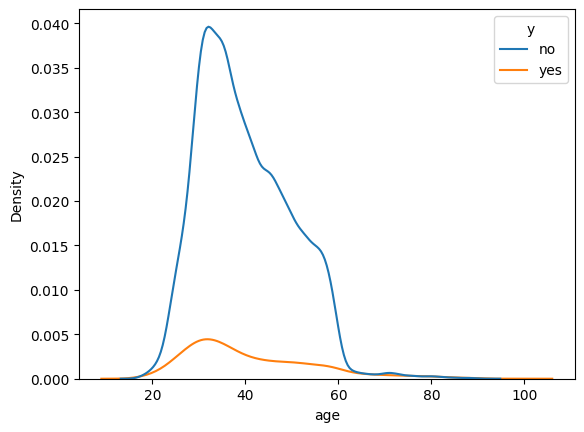

In [104]:
sns.kdeplot(data=bank, x=bank["age"], hue="y")

Yonger and older customers tend to convert more than middle-aged customers, presumably because they are looking to build savings and are looking to invest capital, respectively.

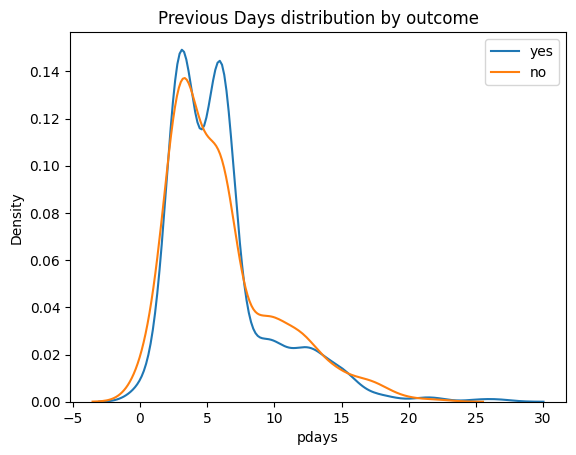

In [92]:
sns.kdeplot(pdays.loc[pdays.y == "yes", "pdays"], label="yes")
sns.kdeplot(pdays.loc[pdays.y == "no", "pdays"], label="no")
plt.legend()
plt.title("Previous Days distribution by outcome")
plt.show()

Since distributions for outcomes 'yes' and 'no' are similar, `pdays` attribute is not much informative.

## Social and Economic Context attributes

A consideration for the socioeconomic variables is that they are computed over different frequencies e.g. quarterly, monthly, daily.

In [93]:
soc_attrs = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

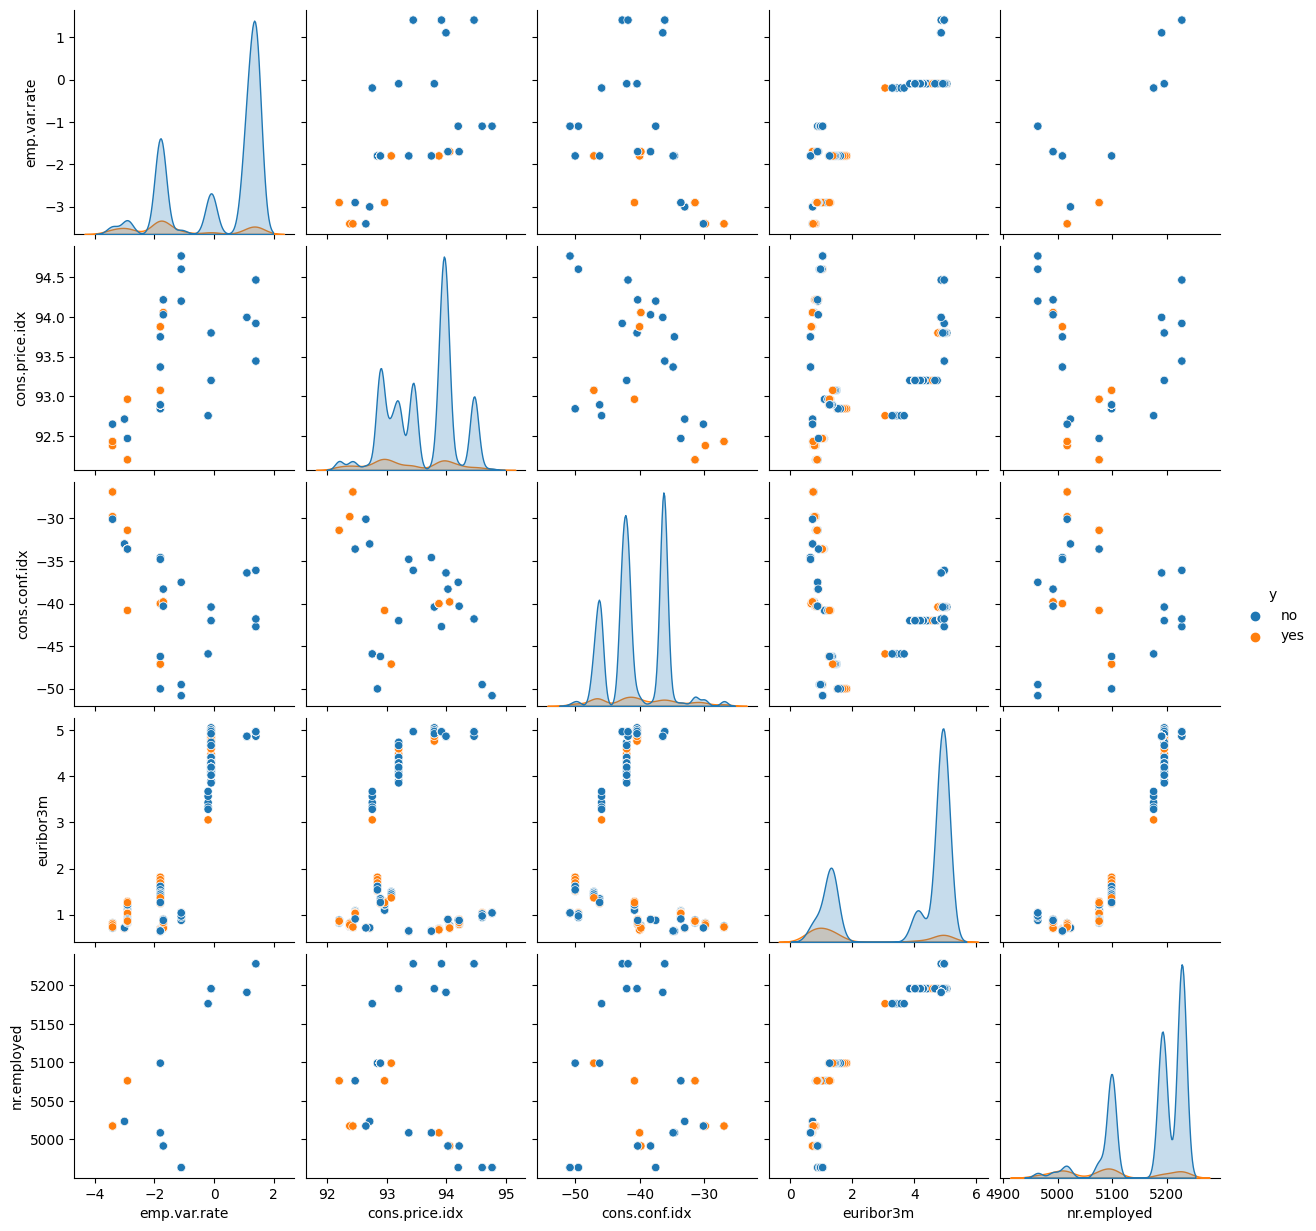

In [102]:
soc_ec = pd.concat([bank[soc_attrs], bank['y']], axis=1)
sns.pairplot(soc_ec, hue='y');

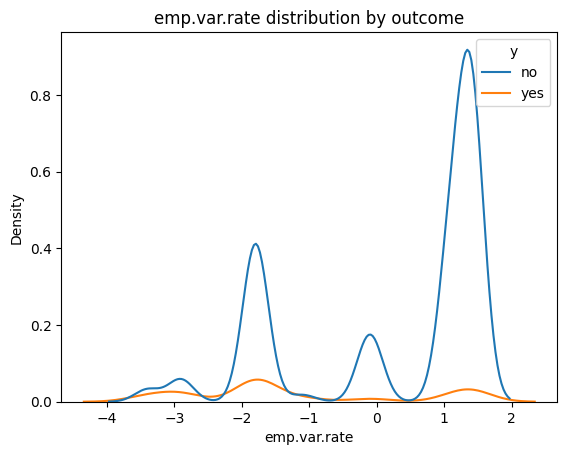

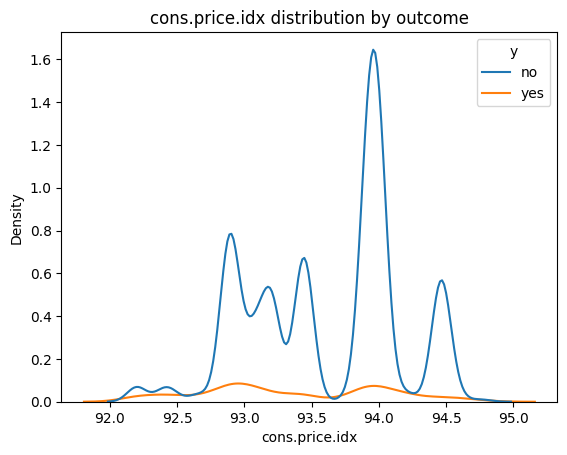

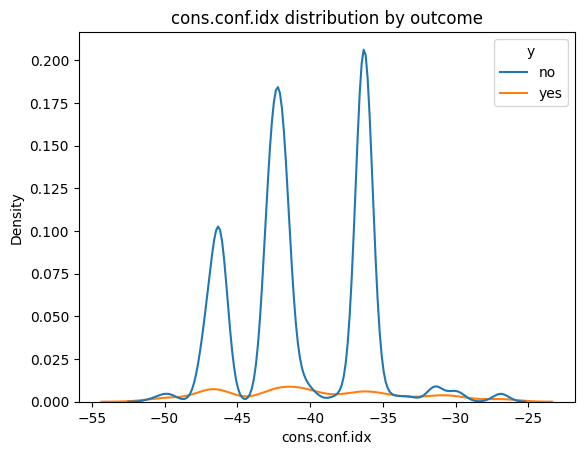

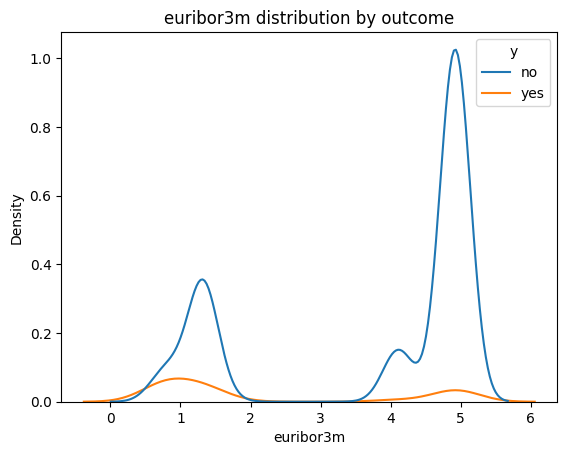

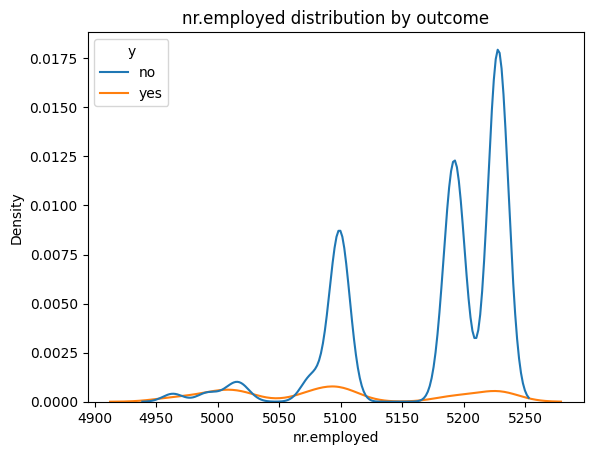

In [107]:
for attr in soc_attrs:
    plt.figure()
    sns.kdeplot(data=bank, x=bank[attr], hue="y")
    plt.title(f"{attr} distribution by outcome")
    plt.show()

- Customers are more likely to convert when:
    - employment variation rate is low
    - euribor 3m rate is low
    - number of employees is low

- These attributes appear to be informative.

## Exploratory Questions

#### Estimate the conversion rate at 95% confidence

Take a random sample 10% of the training set to estimate the true conversion rate at 95% confidence.

In [110]:
x_y = bank.y.sample(frac=0.09, random_state=1)
x_y_n_instances = len(x_y)
x_y_yes_n = len(x_y[x_y == "yes"])
x_p = x_y_yes_n/ len(x_y)

print(f"Number of instances: {len(x_y)}")
print(f"Number of conversions: {x_y_yes_n}")
print(f"Conversion rate: {round(x_p * 100, 2)}%")

Number of instances: 2966
Number of conversions: 349
Conversion rate: 11.77%


In [113]:
se = np.sqrt(x_p * (1 - x_p)/ len(x_y))

print(f"Standard error: {se:.2f}")
print(f"95% confidence interval for p_hat: ({x_p - se*1.96:.2f}, {x_p + se*1.96:.2f})")

Standard error: 0.01
95% confidence interval for p_hat: (0.11, 0.13)


#### Are there an equal number of instances where a customer was not contacted as part of a previous campaign (`pdays`=999) and had no outcome for the previous campaign (`poutcome`='nonexistent')?

In [118]:
n_pdays_999 = bank[bank.pdays == 999].shape[0]
n_poutcome_nonexistent = bank[bank.poutcome == "nonexistent"].shape[0]

print(f"pdays -> 999 = {n_pdays_999}")
print(f"poutcome -> nonexistent = {n_poutcome_nonexistent}")

pdays -> 999 = 31724
poutcome -> nonexistent = 28416


So, there are more customers that were not contacted as part of a previous campaign (`pdays`=999) than there are customers who were not included in the previous marketing campaign (`poutcome`='nonexistent'). This may be due to the fact that customers were not contacted prior to the last campaign but were still contacted as part of the previous campaign which would imply that `pdays` does not count the contact of the previous campaign. Alternatively, `poutcome` might not necessarily require that a customer was contacted, simply that their response from a previous campaign was tracked.

Either way, we don't have any attributes that tell us with certainty whether the customer was targeted as part of the last campaign or was simply tracked as part of it.

#### How many customers were included in the previous campaign and how many of them converted?

In [120]:
x = df.copy()
x_prev = x[x.poutcome.isin(["success" , "failure"])]
x_prev_success = x_prev[x_prev.poutcome == "success"]
p_prev = len(x_prev)/len(x)
p_prev_success = len(x_prev_success)/ len(x_prev)

print(f"Number of customers in previous campaign: {len(x_prev)}")
print(f"Percent of customers in previous campaign: {p_prev*100:.2f}%")
print(f"Converted in previous campaign: {len(x_prev_success)}")
print(f"Previous campaign conversion rate: {p_prev_success*100:.2f}%")

Number of customers in previous campaign: 5625
Percent of customers in previous campaign: 13.66%
Converted in previous campaign: 1373
Previous campaign conversion rate: 24.41%
